# Gradient Boosting Classifier

Objective: Class Prediction using Gradient Boost Classifier  
Dataset: blood_donor.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('blood_donor.data')
print(data.shape)
data.head()

(748, 5)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [2]:
data.columns = ['Recency','Frequency','Monetary','Time','Donate']
data.head()

,Recency,Frequency,Monetary,Time,Donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Data Exploration

0    570
1    178
Name: Donate, dtype: int64


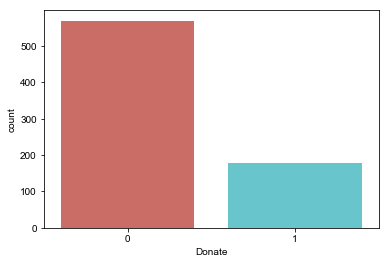

In [3]:
print(data['Donate'].value_counts())

sns.countplot(x='Donate',data = data, palette='hls',order = data['Donate'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Check Null

In [5]:
data.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Donate       0
dtype: int64

## Correlation

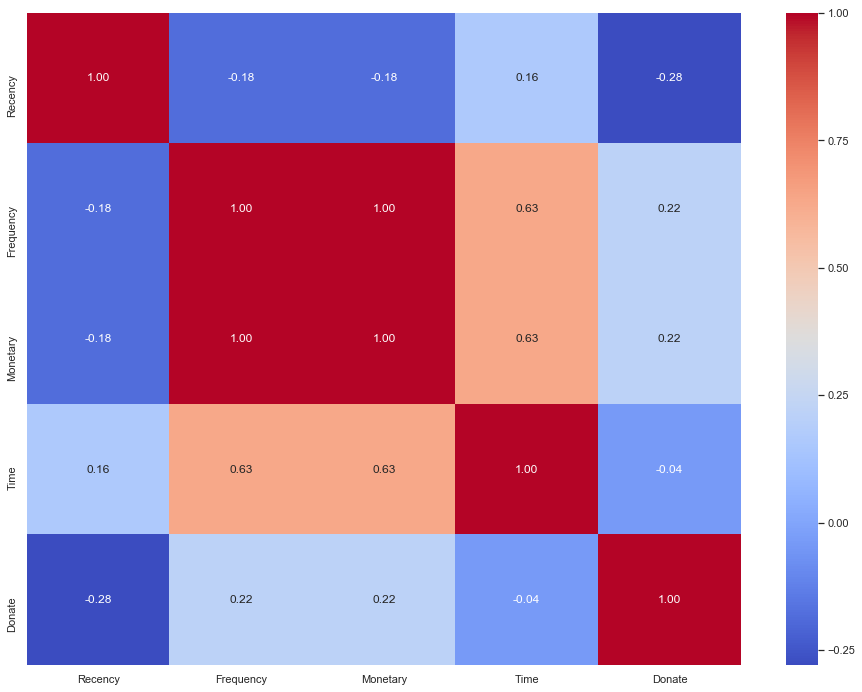

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [7]:
corr_rank = data.corr()
corr_rank["Donate"].sort_values(ascending=False)

Donate       1.000000
Frequency    0.218633
Monetary     0.218633
Time        -0.035854
Recency     -0.279869
Name: Donate, dtype: float64

## Data Processing and Selection

In [8]:
X = data.iloc[:, 0:4].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (748, 4)


array([[    2,    50, 12500,    98],
       [    0,    13,  3250,    28]], dtype=int64)

In [9]:
y = data.iloc[:, -1].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (748,)


array([1, 1, 1, 1, 0], dtype=int64)

## Data Normalization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (748, 4)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.92789873,  7.62334626,  7.62334626,  2.61563344],
       [-1.17511806,  1.28273826,  1.28273826, -0.2578809 ]])

## Split Train Test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (523, 4) (523,)
X TEST Set :  (225, 4) (225,)


## Gradient Boosting Classifier

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
#print("Accuracy score         :", round(gb.score(X_test, y_test),4))
print("Accuracy               :", round(metrics.accuracy_score(y_test, y_pred),4))
print("Precision              :", round(metrics.precision_score(y_test, y_pred),4))
print("Recall                 :", round(metrics.recall_score(y_test, y_pred),4))

R-Square               : -0.0682
Mean Absolute Error    : 0.2089
Mean Squared Error     : 0.2089
Root Mean Squared Error: 0.457
Accuracy               : 0.7911
Precision              : 0.7826
Recall                 : 0.3


## Data Prediction

In [13]:
df_pred1 = data[data.index == 3]
df_pred2 = data[data.index == 4]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Recency,Frequency,Monetary,Time,Donate
3,2,20,5000,45,1
4,1,24,6000,77,0


In [14]:
Xhat = df_pred.iloc[:, 0:4].values
Xhat = scaler.transform(Xhat)

yhat = data.iloc[:, -1].values

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
GB_pred = gb.predict(Xhat)
GB_pred

array([1, 0], dtype=int64)